## Frequência em dados contínuos e pandas CrossTab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importando as bibliotecas
import pandas as pd
from zipfile import ZipFile

#Lendo a base de dados
caminho = "/content/drive/MyDrive/Bootcamp Alura/Módulo 03/Arquivos/dados/PeNSE_2015_AMOSTRA2.zip"
zip = ZipFile(caminho)
caminho_pasta_zipada = zip.namelist()[1]

dados = pd.read_csv(zip.open(caminho_pasta_zipada), sep = ";", thousands = ".", decimal = ",")
dados.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11005,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,2,1,2,1,1,4,2,-1,3,1,1,-1,1,1,2,2,1,2,2,2,2,2,2,2,371.0,1570.0,37.1,157.0,2,1,1223,1,299.735235,1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,2,3,2,4,4,4,1,2,3,3,1,-1,1,1,2,2,2,2,2,1,2,2,2,2,502.0,1520.0,50.2,152.0,2,2,1223,1,355.170081,1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,2,1,2,1,2,3,1,2,1,2,5,99,1,-1,2,2,1,1,1,1,1,1,1,1,482.0,1614.0,48.2,161.4,2,2,1223,1,299.735235,1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,6,3,2,4,1,3,2,7,1,5,1,-1,2,...,2,1,2,2,2,4,1,10,3,1,2,-1,1,-1,2,2,1,2,2,2,1,2,2,2,694.0,1725.0,69.4,172.5,2,3,1223,1,355.170081,1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,1,4,2,2,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.0,1675.0,78.9,167.5,2,4,1223,1,299.735235,1,2,4,1,5,1,296


In [ ]:
#Lendo os arquivos que estão dentro da pasta zipada
#O mesmo pode ser feito usando o método infolist()
zip.namelist()

['arquivos csv/',
 'arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV',
 'arquivos csv/PENSE_AMOSTRA2_ALUNOESCOLA.CSV',
 'arquivos csv/PENSE_AMOSTRA2_ESCOLA.CSV',
 'arquivos sas/',
 'arquivos sas/pense_amostra2_aluno.sas7bdat',
 'arquivos sas/pense_amostra2_alunoescola.sas7bdat',
 'arquivos sas/pense_amostra2_escola.sas7bdat',
 'arquivos xlsx/',
 'arquivos xlsx/PENSE_AMOSTRA2_ALUNO.xlsx',
 'arquivos xlsx/PENSE_AMOSTRA2_ALUNOESCOLA.xlsx',
 'arquivos xlsx/PENSE_AMOSTRA2_ESCOLA.xlsx',
 'Dicionario_PENSE_Microdados_AMOSTRA2.xls']

In [ ]:
#Consultando o número de linhas e colunas da base de dados
#16556 alunos foram entrevistados na pesquisa
dados.shape

(16556, 181)

In [ ]:
#Consultando as colunas
dados.columns

Index(['ANOPESQ', 'PAIS', 'REGEOGR', 'VB00004', 'VB01001', 'VB01002',
       'VB01003', 'VB01004', 'VB01005', 'VB01006',
       ...
       'ESTRATO_EXP', 'ESTRATOGEOREG', 'PESO', 'V0006', 'V0007', 'V0008',
       'V0041', 'aluno', 'escola', 'turma'],
      dtype='object', length=181)

In [ ]:
#Consultando as informações sobre os dados
#Verificando os tipos de dados (dtypes)
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16556 entries, 0 to 16555
Columns: 181 entries, ANOPESQ to turma
dtypes: float64(10), int64(171)
memory usage: 22.9 MB


In [ ]:
#Selecionando as colunas do tipo "object"
dados.select_dtypes(include="object")

""
0
1
2
3
4
...
16551
16552
16553
16554


In [ ]:
#Selecionando as colunas do tipo "float64"
dados.select_dtypes(include="float64")

,TEMPODESLOC,TEMPOTOTAL,TEMPOEDFIS,TEMPOEXTRA,TEMPOEST,VB17001,VB17002,VB17003,VB17004,PESO
0,0.0,15.0,0.0,15.0,60.0,371.0,1570.0,37.1,157.0,299.735235
1,120.0,510.0,260.0,130.0,300.0,502.0,1520.0,50.2,152.0,355.170081
2,0.0,585.0,130.0,455.0,420.0,482.0,1614.0,48.2,161.4,299.735235
3,0.0,0.0,0.0,0.0,0.0,694.0,1725.0,69.4,172.5,355.170081
4,30.0,165.0,90.0,45.0,60.0,789.0,1675.0,78.9,167.5,299.735235
...,...,...,...,...,...,...,...,...,...,...
16551,30.0,400.0,110.0,260.0,240.0,567.0,1679.0,56.7,167.9,447.815539
16552,20.0,800.0,325.0,455.0,240.0,619.0,1858.0,61.9,185.8,592.507440
16553,0.0,0.0,0.0,0.0,60.0,609.0,1594.0,60.9,159.4,401.131512
16554,75.0,215.0,35.0,105.0,120.0,473.0,1578.0,47.3,157.8,442.718091


In [ ]:
#Analisando a frequência do gênero dos estudantes
dados["VB01001"].value_counts()

1    8287
2    8269
Name: VB01001, dtype: int64

In [ ]:
#Analisando a frequência em porcentagem
#O equilíbrio faz parte da estratégia de amostragem na pesquisa
dados["VB01001"].value_counts(normalize = True) * 100

1    50.054361
2    49.945639
Name: VB01001, dtype: float64

In [ ]:
##Analisando a frequência da satisfação dos estudantes com o corpo
frequencia = dados["VB11007"].value_counts()
frequencia

2     6920
1     4608
4     2326
3     1807
5      714
99     181
Name: VB11007, dtype: int64

In [ ]:
#Analisando a frequência em porcentagem
percentual = dados["VB11007"].value_counts(normalize = True) * 100
percentual

2     41.797536
1     27.832810
4     14.049287
3     10.914472
5      4.312636
99     1.093259
Name: VB11007, dtype: float64

In [ ]:
#Criando a tabela de frequência

#Dicionário
respostas = {
    1: "Muito satisfeito",
    2: "Satisfeito",
    3: "Indiferente",
    4: "Insatisfeito",
    5: "Muito instisfeito",
    99: "Não Informado"
}

dist_freq = pd.DataFrame({"Frequência": frequencia, "Percentual": percentual })
dist_freq.rename(index = respostas, inplace = True)
dist_freq.rename_axis("Sentimento em relação ao seu corpo", axis=1, inplace = True) #coluna
dist_freq

Sentimento em relação ao seu corpo,Frequência,Percentual
Satisfeito,6920,41.797536
Muito satisfeito,4608,27.832810
Insatisfeito,2326,14.049287
Indiferente,1807,10.914472
Muito instisfeito,714,4.312636
Não Informado,181,1.093259


In [ ]:
#Analisando o peso e a altura dos estudantes

#Altura
dados["VB17004"]

0        157.0
1        152.0
2        161.4
3        172.5
4        167.5
         ...  
16551    167.9
16552    185.8
16553    159.4
16554    157.8
16555    163.9
Name: VB17004, Length: 16556, dtype: float64

In [ ]:
#Peso
dados["VB17003"]

0        37.1
1        50.2
2        48.2
3        69.4
4        78.9
         ... 
16551    56.7
16552    61.9
16553    60.9
16554    47.3
16555    62.6
Name: VB17003, Length: 16556, dtype: float64

**Cálculo do IMC:**
\begin{equation}
IMC =\dfrac{PESO}{ALTURA ^2}
\end{equation}
<br>

In [ ]:
#Calculando o IMC
#É necessário converter a altura de cm para m
dados["IMC"] = dados["VB17003"] / ((dados["VB17004"]/100)**2)
dados["IMC"]

0        15.051321
1        21.727839
2        18.502907
3        23.322831
4        28.122076
           ...    
16551    20.113223
16552    17.930782
16553    23.968489
16554    18.995343
16555    23.303246
Name: IMC, Length: 16556, dtype: float64

**Classificação do IMC:**
- Menor que 18,5 - Abaixo do peso
- Entre 18,5 e 24,9 - Peso normal
- Entre 25 e 29,9 - Sobrepeso (acima do peso desejado)
- Igual ou acima de 30 - Obesidade

http://bvsms.saude.gov.br/bvs/dicas/215_obesidade.html


In [ ]:
#Criando as classes do IMC

'''
pandas.cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False, duplicates='raise', ordered=True)

Bin values into discrete intervals.
Use cut when you need to segment and sort data values into bins. This function is also useful for going from a continuous variable to a categorical variable 
For example, cut could convert ages to groups of age ranges. Supports binning into an equal number of bins, or a pre-specified array of bins

include_lowestbool, default False
Whether the first interval should be left-inclusive or not
'''

classes = [0, 18.5, 25, 30, 60]
labels = ["Abaixo do peso", "Peso normal", "Sobrepeso", "Obesidade"]

dados["CLASSE_IMC"] = pd.cut(x = dados["IMC"], bins = classes, labels = labels, include_lowest = True)

dados[["IMC", "CLASSE_IMC"]]

,IMC,CLASSE_IMC
0,15.051321,Abaixo do peso
1,21.727839,Peso normal
2,18.502907,Peso normal
3,23.322831,Peso normal
4,28.122076,Sobrepeso
...,...,...
16551,20.113223,Peso normal
16552,17.930782,Abaixo do peso
16553,23.968489,Peso normal
16554,18.995343,Peso normal


In [ ]:
#Calculando a frequência do IMC
frequencia = dados["CLASSE_IMC"].value_counts()
percentual = dados["CLASSE_IMC"].value_counts(normalize = True) * 100
dist_freq = pd.DataFrame({"Frequência": frequencia, "Percentual": percentual })
#dist_freq.rename(index = respostas, inplace = True)
#dist_freq.rename_axis("Sentimento em relação ao seu corpo", axis=1, inplace = True)
dist_freq

,Frequência,Percentual
Peso normal,9188,55.496497
Abaixo do peso,4975,30.049529
Sobrepeso,1760,10.630587
Obesidade,633,3.823387


In [ ]:
#Mostrando o valor mínimo da altura
dados["VB17004"].min()

124.1

In [ ]:
#Mostrando o valor máximo da altura
dados["VB17004"].max()

195.3

In [ ]:
#Calculando o número de classes
import numpy as np

#O número de classes depende do tamanho da amostra
tamanho_amostra = len(dados)

'''
A Regra de Sturges permite determinar o número de classes ou intervalos nos quais uma amostra pode ser dividida, 
para resumir uma amostra de dados através da criação de tabelas e gráficos

k é o número de classes
'''

k = int((1 + ((10/3)*np.log10(tamanho_amostra))))

dados["CLASSE_ALTURA"] = pd.cut(x = dados["VB17004"], bins = k, include_lowest = True)

frequencia = dados["CLASSE_ALTURA"].value_counts()
percentual = dados["CLASSE_ALTURA"].value_counts(normalize = True) * 100
dist_freq = pd.DataFrame({"Frequência": frequencia, "Percentual": percentual })
dist_freq

,Frequência,Percentual
"(157.327, 162.073]",3110,18.784731
"(152.58, 157.327]",2734,16.513651
"(162.073, 166.82]",2550,15.402271
"(166.82, 171.567]",2063,12.460739
"(147.833, 152.58]",1782,10.763469
"(171.567, 176.313]",1416,8.552791
"(143.087, 147.833]",1012,6.112588
"(176.313, 181.06]",749,4.524040
"(138.34, 143.087]",484,2.923411
"(181.06, 185.807]",300,1.812032


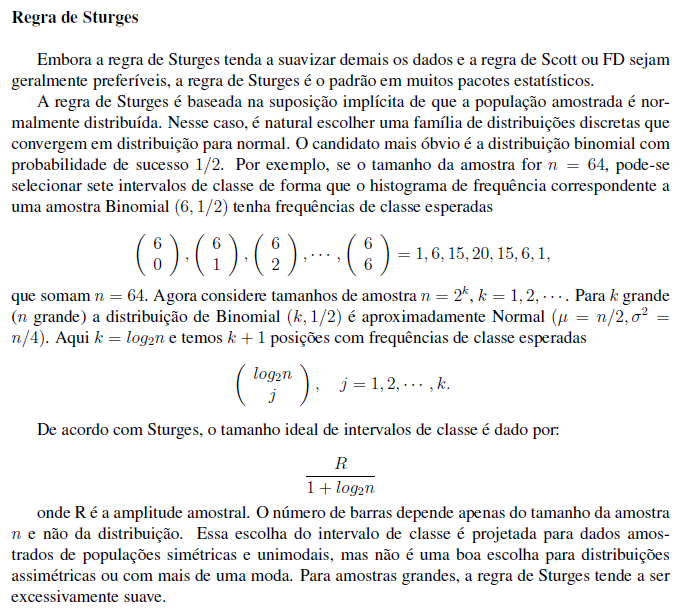

### Desafio 01: Criar uma tabela de frequência para o peso seguindo a Regra de Sturges

In [ ]:
#Calculando o número de classes - Peso

tamanho_amostra = len(dados)

k = int((1 + ((10/3)*np.log10(tamanho_amostra))))

dados["CLASSE_PESO"] = pd.cut(x = dados["VB17003"], bins = k, include_lowest = True)

frequencia = dados["CLASSE_PESO"].value_counts()
percentual = dados["CLASSE_PESO"].value_counts(normalize = True) * 100
dist_freq = pd.DataFrame({"Frequência": frequencia, "Percentual": percentual })
dist_freq

,Frequência,Percentual
"(46.32, 57.7]",5754,34.754772
"(34.94, 46.32]",3852,23.266489
"(57.7, 69.08]",3724,22.493356
"(69.08, 80.46]",1425,8.607151
"(23.56, 34.94]",927,5.599179
"(80.46, 91.84]",544,3.285818
"(91.84, 103.22]",202,1.220101
"(103.22, 114.6]",77,0.465088
"(114.6, 125.98]",20,0.120802
"(125.98, 137.36]",15,0.090602


### Continuando a aula...

In [ ]:
#Calculando a frequência cruzando duas tabelas

'''
pandas.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False)
Compute a simple cross tabulation of two (or more) factors 
By default computes a frequency table of the factors unless an array of values and an aggregation function are passed
'''

#Normalizando o total de dados
frequencia_cruzada = pd.crosstab(dados["VB11007"], dados["VB01001"], normalize = True) * 100
frequencia_cruzada.rename(index = respostas, inplace = True)
frequencia_cruzada.rename(columns = {1: "Masculino", 2: "Feminino"}, inplace = True)
frequencia_cruzada

VB01001,Masculino,Feminino
VB11007,,
Muito satisfeito,16.199565,11.633245
Satisfeito,21.079971,20.717565
Indiferente,5.738101,5.176371
Insatisfeito,4.747524,9.301764
Muito instisfeito,1.570428,2.742208
Não Informado,0.718773,0.374487


In [ ]:
#Normalizando pelas colunas (o somatório de cada coluna resulta em 100%)
frequencia_cruzada = pd.crosstab(dados["VB11007"], dados["VB01001"], normalize = "columns") * 100
frequencia_cruzada.rename(index = respostas, inplace = True)
frequencia_cruzada.rename(columns = {1: "Masculino", 2: "Feminino"}, inplace = True)
frequencia_cruzada

VB01001,Masculino,Feminino
VB11007,,
Muito satisfeito,32.363944,23.291813
Satisfeito,42.114155,41.480227
Indiferente,11.463738,10.364010
Insatisfeito,9.484735,18.623776
Muito instisfeito,3.137444,5.490386
Não Informado,1.435984,0.749788


In [ ]:
#Normalizando pelos índices (o somatório de cada linha resulta em 100%)
frequencia_cruzada = pd.crosstab(dados["VB11007"], dados["VB01001"], normalize = "index") * 100
frequencia_cruzada.rename(index = respostas, inplace = True)
frequencia_cruzada.rename(columns = {1: "Masculino", 2: "Feminino"}, inplace = True)
frequencia_cruzada

VB01001,Masculino,Feminino
VB11007,,
Muito satisfeito,58.203125,41.796875
Satisfeito,50.433526,49.566474
Indiferente,52.573326,47.426674
Insatisfeito,33.791917,66.208083
Muito instisfeito,36.414566,63.585434
Não Informado,65.745856,34.254144


### Desafio 02: Criar outros CrossTabs para analisar outras variáveis, além das abordadas em aulas. Pesquisar sobre o parâmetro aggfunc e testar em pelo menos uma tabela criada

In [ ]:
#Lendo os dados do Dicionário PeNSE
dicionario = pd.read_excel("/content/drive/MyDrive/Bootcamp Alura/Módulo 03/Arquivos/dados/Dicionario_PENSE_Microdados_AMOSTRA2.xls")

In [ ]:
#Criando a função para criar um dicionário com as respostas
def cria_dicionario_respostas(cod_pergunta: str, dicionario = dicionario):
  '''
  Esta função cria um dicionario com as respostas a partir do código da pergunta

  Parâmetros: 
    cod_pergunta: string com o código da pergunta
    dicionario: DataFrame com os dados do arquivo "Dicionario_PENSE_Microdados_AMOSTRA2.xls"
  
  Retorna:
   dicionario_respostas: dicionário com as váriaveis (keys) e as alternativas de resposta (values)
   pergunta: string com texto da pergunta
  '''

  #Fazendo a query
  busca = dicionario.query(f"VARIÁVEL == '{cod_pergunta}'")

  #Selecionando o índice da pergunta no dicionário
  indice_pergunta = (busca.index).tolist()[0]
  
  #Guardando o texto da pergunta
  #df.iloc[<linhas>, <colunas>]
  pergunta = dicionario.iloc[indice_pergunta, 1]

  #Criando um dicionário para as respostas possíveis
  dicionario_respostas = {}

  #Enquanto nnão encontro o código da próxima perguntar
  indice = indice_pergunta + 1

  while str(dicionario.loc[indice]["VARIÁVEL"]).startswith("VB") != True:

    #Adicionando as variáveis e as alternativas de resposta ao dicionário
    nova_linha = {int(dicionario.loc[indice]["VARIÁVEL"]) : dicionario.loc[indice]["QUESTIONÁRIO DO ALUNO"]}

    #Atualizando o dicionário com a nova linha
    dicionario_respostas.update(nova_linha)

    indice = indice + 1
  
  return dicionario_respostas, pergunta

**Objetivo: observar algum indício de transtorno dismórfico corporal (TDC), que se caracteriza pela percepção alterada de si mesmo diante do espelho: quando o que a pessoa enxerga no espelho não condiz com a realidade.**

https://www.cellerafarma.com.br/bem-estar/disturbio-de-imagem-entenda-o-que-e

Homens e mulheres são vítimas do transtorno em igual proporção.

Desta forma, não será feita distinção entre os sexos feminino e masculino.

In [ ]:
#Calculando a frequência cruzando a Classificação do IMC e a pergunta "VB11001: Quanto ao seu corpo, você se considera:"

#Criando os dicionários
respostas_indices = cria_dicionario_respostas("VB11001")[0]
pergunta_indices = cria_dicionario_respostas("VB11001")[1]

frequencia_cruzada = pd.crosstab(dados["VB11001"], dados["CLASSE_IMC"], normalize = True) * 100
frequencia_cruzada.rename(index = respostas_indices, inplace = True)
frequencia_cruzada.rename_axis(pergunta_indices, axis=0, inplace = True)
frequencia_cruzada.rename_axis("Classificação do IMC:", axis=1, inplace = True)
frequencia_cruzada.round(2)

Classificação do IMC:,Abaixo do peso,Peso normal,Sobrepeso,Obesidade
"Quanto ao seu corpo, você se considera:",,,,
Muito magro(a),3.84,1.79,0.10,0.02
Magro(a),11.09,8.29,0.25,0.07
Normal,13.84,35.03,3.94,0.48
Gordo(a),0.75,8.94,5.48,2.65
Muito Gordo(a),0.21,0.90,0.79,0.58
Não informado,0.32,0.54,0.07,0.02


Analisando essa primeira pergunta, não é possível observar grandes distorções em relação à forma como o estudante se enxerga.

O único ponto a observar: 8.94% dos estudantes tem peso considerado normal e se consideram gordos(as).

In [ ]:
#Calculando a frequência cruzando a Classificação do IMC e a pergunta "VB11002: O que você está fazendo em relação a seu peso?"

#Criando os dicionários
respostas_indices = cria_dicionario_respostas("VB11002")[0]
pergunta_indices = cria_dicionario_respostas("VB11002")[1]

frequencia_cruzada = pd.crosstab(dados["VB11002"], dados["CLASSE_IMC"], normalize = True) * 100
frequencia_cruzada.rename(index = respostas_indices, inplace = True)
frequencia_cruzada.rename_axis(pergunta_indices, axis=0, inplace = True)
frequencia_cruzada.rename_axis("Classificação do IMC:", axis=1, inplace = True)
frequencia_cruzada.round(2)

Classificação do IMC:,Abaixo do peso,Peso normal,Sobrepeso,Obesidade
O que você está fazendo em relação a seu peso?,,,,
Não estou fazendo nada,13.25,20.69,2.57,0.76
Estou tentando perder peso,2.00,16.69,6.80,2.83
Estou tentando ganhar peso,9.62,6.27,0.22,0.04
Estou tentando manter o mesmo peso,4.83,11.27,0.97,0.19
Não informado,0.35,0.57,0.07,0.01


Já analisando o que os estudantes estão fazendo em relação ao peso, foi observado que:

|| Abaixo do peso  | Peso normal  |
|-|:-:|:--:|
|**Não estou fazendo nada**|<font color = red>13.25%|20.69%|
|**Estou tentando perder peso**|<font color = red>2.00%|<font color = red>16.69%|
|**Estou tentando ganhar peso**|9.62%|<font color = red>6.27%|
|**Estou tentando manter o mesmo peso**|<font color = red>4.83%|11.27%|
>
Ou seja, é possível identificar alguns comportamentos preocupantes.

O transtorno dismórfico corporal geralmente não vem sozinho: cerca de 32% das pessoas que sofrem com o distúrbio de imagem sofrem de anorexia ou bulimia.

In [ ]:
#Calculando a frequência cruzando a Classificação do IMC e a pergunta "VB11003: NOS ÚLTIMOS 30 DIAS, 
#você vomitou ou tomou laxantes para perder peso ou evitar ganhar peso?"

#Criando os dicionários
respostas_indices = cria_dicionario_respostas("VB11003")[0]

frequencia_cruzada = pd.crosstab(dados["VB11003"], dados["CLASSE_IMC"], normalize = True) * 100
frequencia_cruzada.rename(index = respostas_indices, inplace = True)
frequencia_cruzada.rename_axis("Classificação do IMC:", axis=1, inplace = True)
frequencia_cruzada.round(2)

Classificação do IMC:,Abaixo do peso,Peso normal,Sobrepeso,Obesidade
VB11003,,,,
Sim,2.10,3.98,1.15,0.40
Não,27.53,50.92,9.40,3.40
Não informado,0.42,0.60,0.08,0.02


Felizmente, 91.25% dos estudantes responderam "Não" para pergunta acima.

Ainda assim, é importante ressaltar que dentre os estudantes que responderam "Sim", a maior porcentagem está "Abaixo do Peso" ou tem "Peso Normal".

A origem do transtorno é neuroquímica, mas o **fator ambiental** exerce bastante influência, principalmente na fase da adolescência, onde o cérebro está em formação.

In [ ]:
#Calculando a frequência cruzando a Classificação do IMC e a pergunta "VB07008: NOS ÚLTIMOS 30 DIAS, 
#qual o motivo/causa de seus colegas terem te esculachado, zombado, zoado, caçoado, mangado, intimidado ou humilhado?"

#Criando os dicionários
respostas_indices = cria_dicionario_respostas("VB07008")[0]

frequencia_cruzada = pd.crosstab(dados["VB07008"], dados["CLASSE_IMC"], normalize = "columns") * 100
frequencia_cruzada.rename(index = respostas_indices, inplace = True)
frequencia_cruzada.rename_axis("Classificação do IMC:", axis=1, inplace = True)
frequencia_cruzada.round(2)

Classificação do IMC:,Abaixo do peso,Peso normal,Sobrepeso,Obesidade
VB07008,,,,
Pulo no questionário,54.07,57.27,55.06,51.97
A minha cor ou raça,2.77,2.38,2.10,1.42
A minha religião,1.65,1.44,1.25,0.79
A aparência do meu rosto,5.23,4.35,2.27,0.79
A aparência do meu corpo,6.31,3.89,14.83,28.12
A minha orientação sexual,0.90,1.00,1.02,0.79
A minha região de origem,0.74,0.74,0.68,0.32
Outros motivos/causas,27.82,28.45,22.33,15.48
Não informado,0.50,0.48,0.45,0.32


Ao normalizar pelas colunas, é possível observar que estudantes em todas as classificações de IMC sofrem bullying devido à aparência do seu corpo.

Especialmente entre estudantes com sobrepeso e obesidade, essa motivação é frequente.

|  | Abaixo do peso | Peso normal | Sobrepeso | Obesidade |
|-|:-:|:-:|:-:|:-:|
| **A aparência do meu corpo** | 6.31% | 3.89% | <font color = red> 14.83% | <font color = red> 28.12% |

**Changing Pandas Crosstab Aggregation**

If you wanted to change the type of aggregation used, you can apply the aggfunc parameter. To use the aggfunc parameter requires the values parameter to also be passed.

In [ ]:
#Calculando a frequência cruzando o Sexo e a pergunta "VB11001: Quanto ao seu corpo, você se considera:" 
#e agregando pelo valor mínimo do IMC

#Criando os dicionários
respostas_indices = cria_dicionario_respostas("VB11001")[0]
pergunta_indices = cria_dicionario_respostas("VB11001")[1]

respostas_colunas = cria_dicionario_respostas("VB01001")[0]
pergunta_colunas = cria_dicionario_respostas("VB01001")[1]

frequencia_cruzada = pd.crosstab(dados["VB11001"], dados["VB01001"], values=dados["IMC"], aggfunc="min").round(2) 
frequencia_cruzada.rename(index = respostas_indices, inplace = True)
frequencia_cruzada.rename(columns = respostas_colunas, inplace = True)
frequencia_cruzada.rename_axis(pergunta_indices, axis=0, inplace = True)
frequencia_cruzada.rename_axis(pergunta_colunas, axis=1, inplace = True)
frequencia_cruzada

Qual é o seu sexo?,Masculino,Feminino
"Quanto ao seu corpo, você se considera:",,
Muito magro(a),12.88,13.00
Magro(a),11.90,12.17
Normal,12.48,12.32
Gordo(a),0.40,13.94
Muito Gordo(a),13.89,11.14
Não informado,13.63,13.92


Analisando o IMC mínimo em cada categoria e nos sexos feminino e masculino, infelizmente, algum erro na coleta de dados resultou em um IMC de 0.40, que não é um valor possível.

Sendo assim, esse valor será desconsiderado.

In [ ]:
dados.loc[dados["IMC"] < 10]

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma,IMC,CLASSE_IMC,CLASSE_ALTURA,CLASSE_PESO
15673,2015,76,5,1,1,4,12,3,9,1,1,8,4,1,1,2,1,1,1,1,1,2,2,2,3,1,2,2,3,8,1,8,1,4,3,1,6,1,1,1,...,3,4,1,2,1,2,2,1,1,-1,1,1,2,2,2,1,2,2,2,2,408.0,1418.0,0.8,141.8,2,2,5121,5,313.160012,1,1,2,-1,15674,355,317,0.397867,Abaixo do peso,"(138.34, 143.087]","(0.628, 12.18]"


In [ ]:
dados.loc[15673][["VB17001", "VB17002", "IMC"]]

VB17001         408
VB17002        1418
IMC        0.397867
Name: 15673, dtype: object

In [ ]:
dados = dados.drop([15673], axis=0)

Uma nova análise será feita considerando a quantidade de estudantes com IMC menor que 18.5 em cada categoria e nos sexos feminino e masculino.

In [ ]:
#Calculando a frequência cruzando o Sexo e a pergunta "VB11001: Quanto ao seu corpo, você se considera:" 
#Agregando pela contagem de IMC menor que 18,5

#Criando os dicionários
respostas_indices = cria_dicionario_respostas("VB11001")[0]
pergunta_indices = cria_dicionario_respostas("VB11001")[1]

respostas_colunas = cria_dicionario_respostas("VB01001")[0]
pergunta_colunas = cria_dicionario_respostas("VB01001")[1]

frequencia_cruzada = pd.crosstab(dados["VB11001"], dados["VB01001"], values=dados[dados["IMC"]<18.5]["IMC"], 
                                 aggfunc="count", margins=True, margins_name="Total")
frequencia_cruzada.rename(index = respostas_indices, inplace = True)
frequencia_cruzada.rename(columns = respostas_colunas, inplace = True)
frequencia_cruzada.rename_axis(pergunta_indices, axis=0, inplace = True)
frequencia_cruzada.rename_axis(pergunta_colunas, axis=1, inplace = True)
frequencia_cruzada

Qual é o seu sexo?,Masculino,Feminino,Total
"Quanto ao seu corpo, você se considera:",,,
Muito magro(a),249,387,636
Magro(a),967,869,1836
Normal,1300,991,2291
Gordo(a),48,75,123
Muito Gordo(a),17,18,35
Não informado,38,15,53
Total,2619,2355,4974


Na análise acima é possível ver um indício preocupante.

Uma quantidade considerável de estudantes com IMC menor que 18.5, ou seja, abaixo do peso, se considera normal.

|  | Masculino | Feminino |
|-|:-:|:-:|
| **Normal** | 49.64% | 42.08% |

É importante salientar que a análise feita aqui é bem simplista e desconsidera questões sociais, má alimentação, prática de atividades físicas etc, são apenas indícios de comportamentos preocupantes.